In [12]:
import hpsv2
import os
import glob
import torch
import matplotlib.pyplot as plt
from PIL import Image

anime_0
acertain_0.png: 0.279052734375
animagine_xl_31_0.png: 0.301513671875
anime_pastel_dream_0.png: 0.319580078125
anythingv5_0.png: 0.291015625
dall_e_2_0.png: 0.280029296875
dall_e_3_0.png: 0.31884765625
sd15_0.png: 0.25439453125
sd21_0.png: 0.273681640625
sdxl_0.png: 0.31396484375

anime_1
acertain_1.png: 0.288330078125
animagine_xl_31_1.png: 0.31689453125
anime_pastel_dream_1.png: 0.284423828125
anythingv5_1.png: 0.289794921875
dall_e_2_1.png: 0.2490234375
dall_e_3_1.png: 0.340087890625
sd15_1.png: 0.281005859375
sd21_1.png: 0.278076171875
sdxl_1.png: 0.3193359375

real_0
acertain_0.png: 0.253662109375
animagine_xl_31_0.png: 0.199951171875
anime_pastel_dream_0.png: 0.25390625
anythingv5_0.png: 0.2232666015625
dall_e_2_0.png: 0.2257080078125
dall_e_3_0.png: 0.25390625
sd15_0.png: 0.218994140625
sd21_0.png: 0.262451171875
sdxl_0.png: 0.27490234375

real_1
acertain_1.png: 0.270751953125
animagine_xl_31_1.png: 0.28125
anime_pastel_dream_1.png: 0.221435546875
anythingv5_1.png: 0.2210

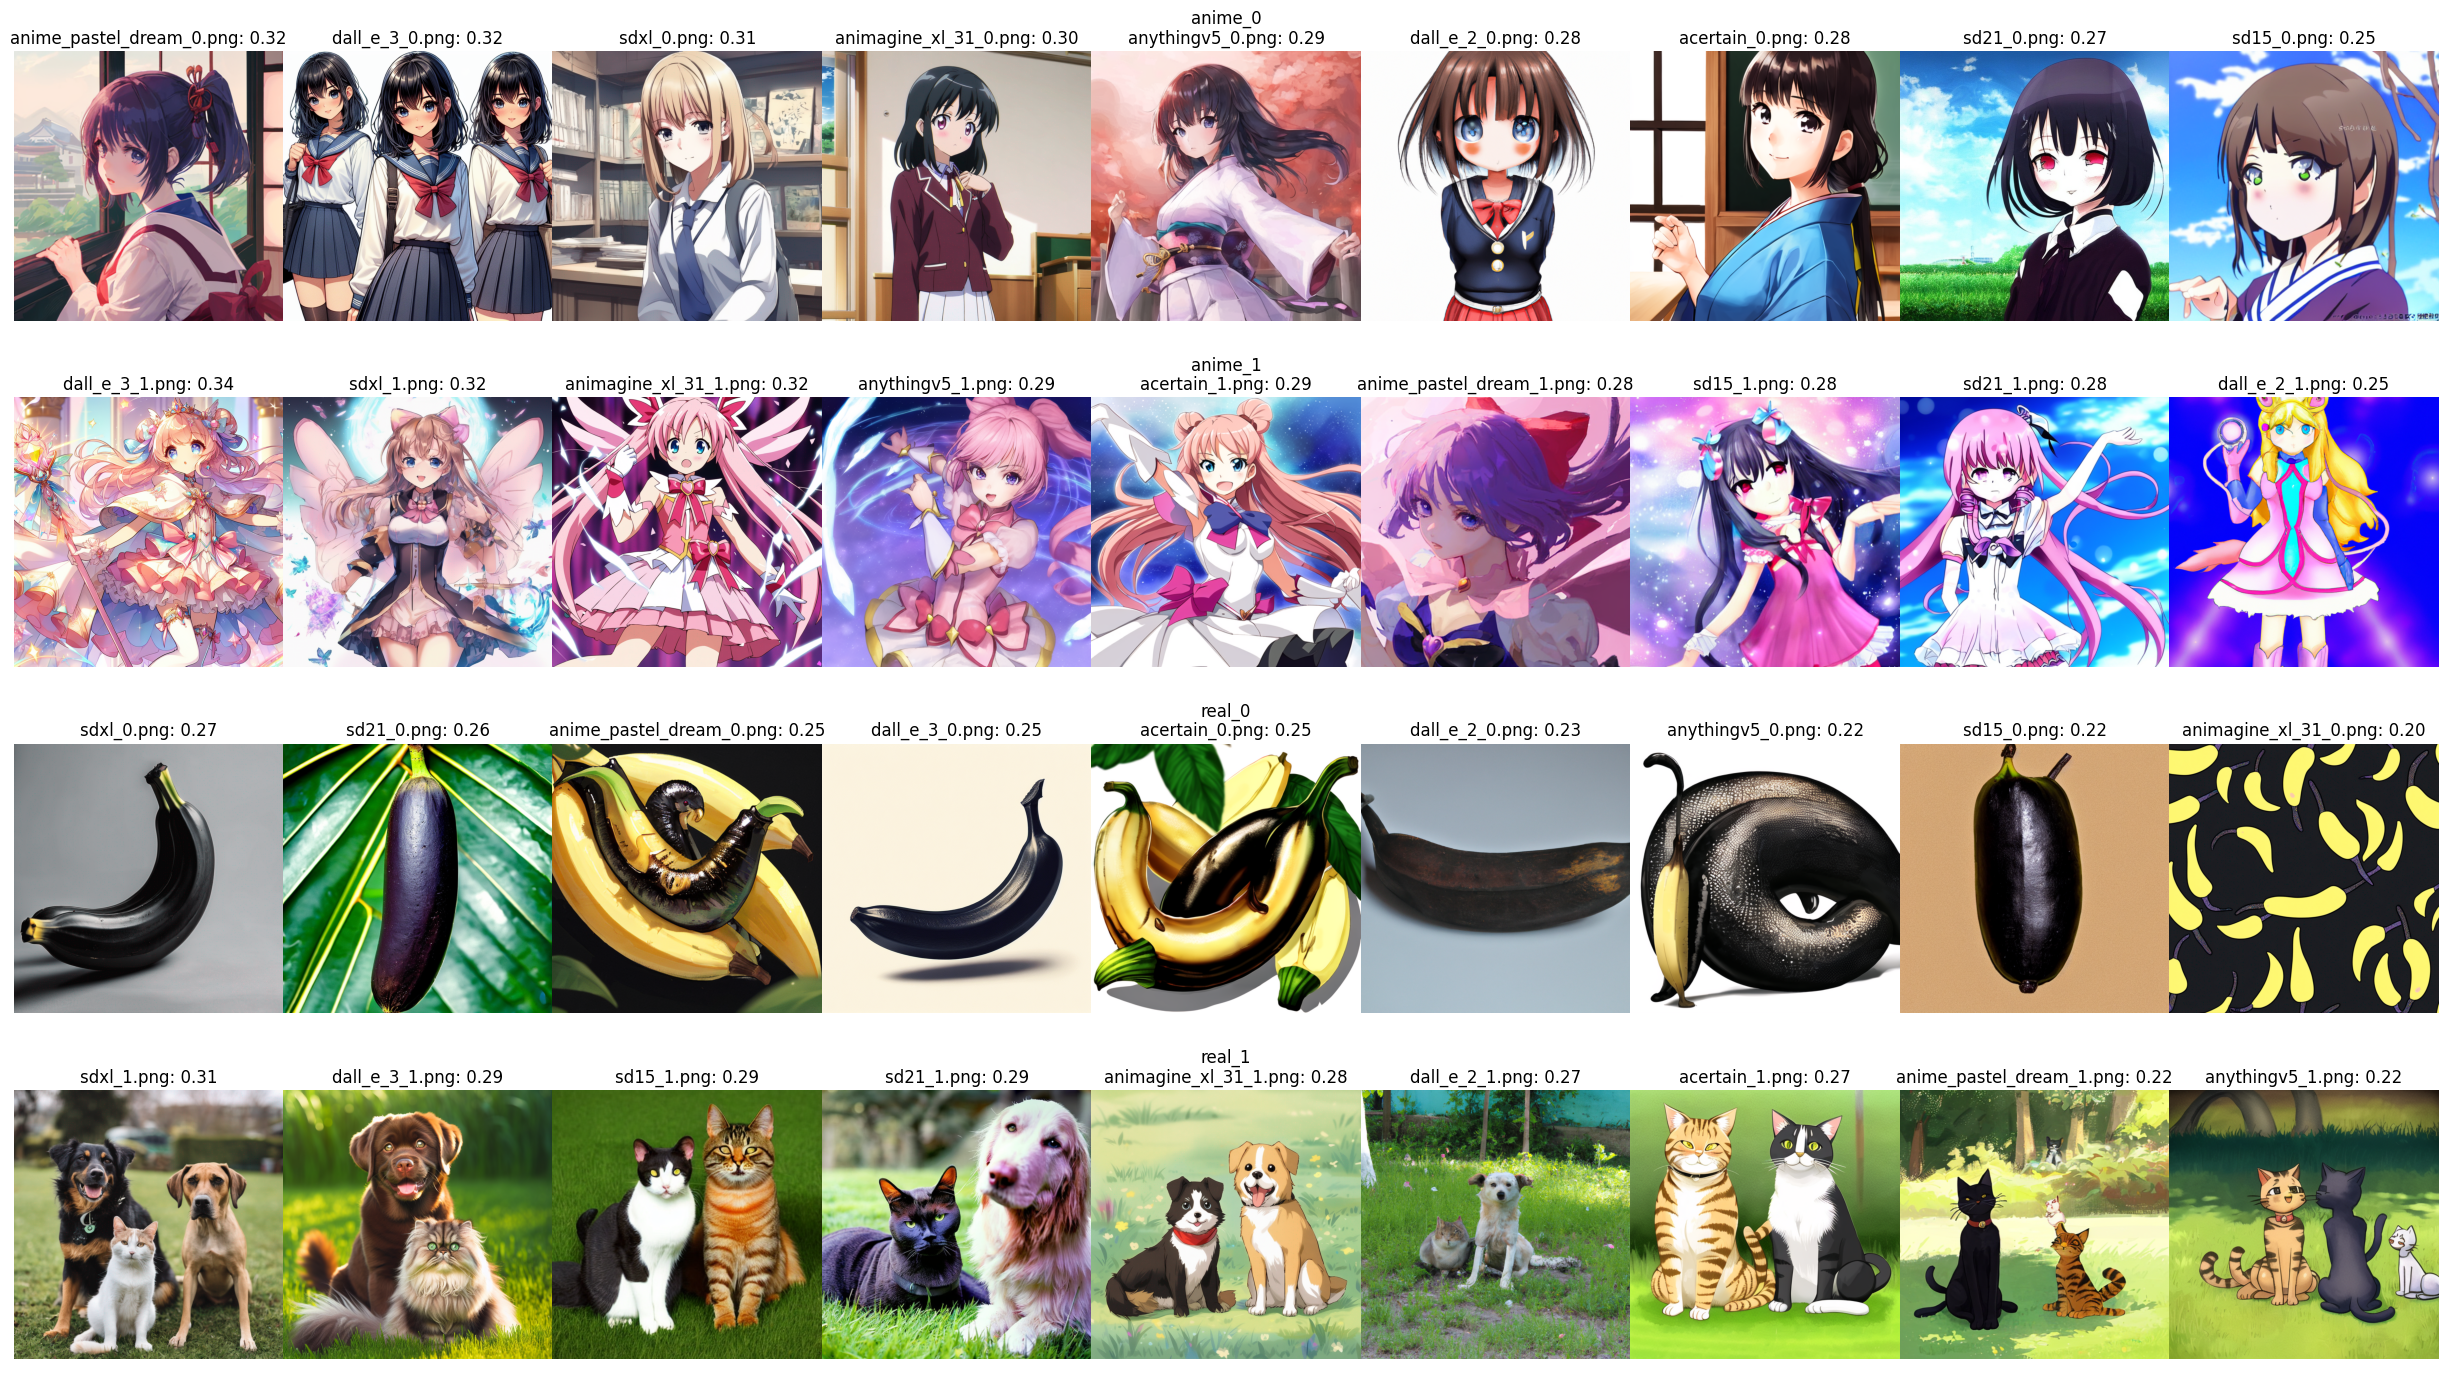

In [13]:
prompts = {
    "anime" : [
        "1girl, japanese school anime, girl, solo, best quality",
        "1girl, magical girl, anime, solo, best quality"
    ],
    "real" : [
        "A black colored banana.",
        "One cat and one dog sitting on the grass."
    ]
}

score_data = {}
image_root_dir = "aesthetics_toy_images"
subdirs = sorted(glob.glob(f"{image_root_dir}/*"))
for subdir in subdirs:
    for i in range(2):
        subdir_key = f"{os.path.basename(subdir)}_{i}"
        print(subdir_key)
        files = sorted(glob.glob(subdir+f"/*{i}.png"))
        result = hpsv2.score(files, prompts[os.path.basename(subdir)][i], hps_version="v2.1")         
        score_data[subdir_key] = {}
        for file, prediction in zip(files, result):
            score_data[subdir_key][os.path.basename(file)] = prediction
            print(f'{os.path.basename(file)}: {prediction}')
        print()

# Plot
fig, axes = plt.subplots(len(score_data), 1, figsize=(25, 3.5 * len(score_data)))

# 各ケースごとにスコアを降順ソートして画像を表示
for i, (case, scores) in enumerate(score_data.items()):
    sorted_scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    images = [Image.open(os.path.join(image_root_dir, case.split("_")[0], img)) for img, score in sorted_scores]
    filenames = [img for img, score in sorted_scores]
    scores = [score for img, score in sorted_scores]
    
    ax = axes[i] if len(score_data) > 1 else axes
    for j, (image, filename, score) in enumerate(zip(images, filenames, scores)):
        ax_sub = ax.inset_axes([j/len(images), 0, 1/len(images), 1], transform=ax.transAxes)
        ax_sub.imshow(image)
        ax_sub.set_title(f'{filename}: {score:.2f}')
        ax_sub.axis('off')
    ax.set_title(case)
    ax.axis('off')

plt.tight_layout()
plt.savefig("hpsv2_predictor.png")
plt.show()    